### Welcome to my Notebook !!

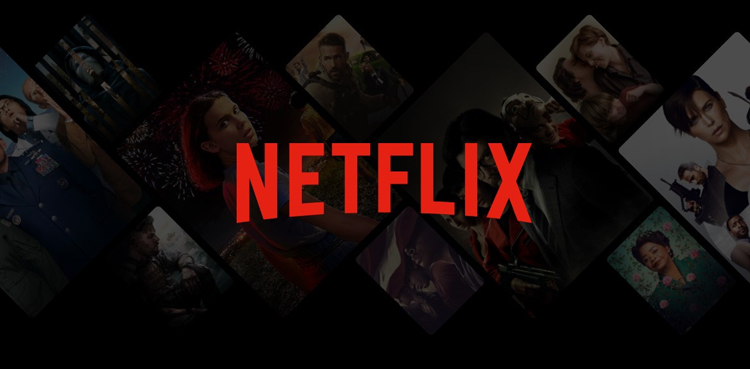

### The objective of this project is to predict Netflix Movie or Series Recomendation

### Import Relevant Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
train_df = pd.read_csv("netflix_titles.csv")

### Basic Understanding of Data

In [3]:
train_df.shape

(8807, 12)

In [4]:
train_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### About this Dataset

In [5]:
"""
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or
tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This
tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with 
details such as - cast, directors, ratings, release year, duration, etc.
"""

'\nNetflix is one of the most popular media and video streaming platforms. They have over 8000 movies or\ntv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This\ntabular dataset consists of listings of all the movies and tv shows available on Netflix, along with \ndetails such as - cast, directors, ratings, release year, duration, etc.\n'

In [6]:
train_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
train_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
train_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Exploratory Data Analysis (EDA) and Feature Engineering

In [10]:
data = train_df.copy()

In [11]:
data.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
from dateutil import parser
data['date_added'] = data['date_added'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notnull(x) else None)

In [13]:
"""
This code uses the parser.parse function from the dateutil library with the fuzzy=True parameter,
which allows it to automatically detect and parse various date formats. The apply function is used 
to apply this parsing function to each element in the 'date_added' column.
"""

"\nThis code uses the parser.parse function from the dateutil library with the fuzzy=True parameter,\nwhich allows it to automatically detect and parse various date formats. The apply function is used \nto apply this parsing function to each element in the 'date_added' column.\n"

In [14]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [15]:
data['data_added_day'] = data['date_added'].dt.day

In [16]:
data['data_added_month'] = data['date_added'].dt.month

In [17]:
data['data_added_year'] = data['date_added'].dt.year

In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [19]:
data.drop(['date_added'], axis=1, inplace=True)

In [20]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [21]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [22]:
# Visualizing Target Feature 'Type'

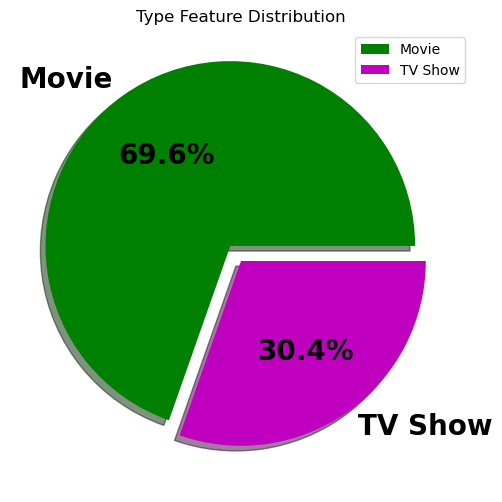

In [23]:
plt.figure(figsize=(10, 6)) 
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, colors=['g', 'm'], shadow=True) 
plt.title('Type Feature Distribution')
plt.legend(loc = 1)
plt.show()

In [24]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [25]:
#  How many unique show IDs are there?

There are 8807 unique show IDs.


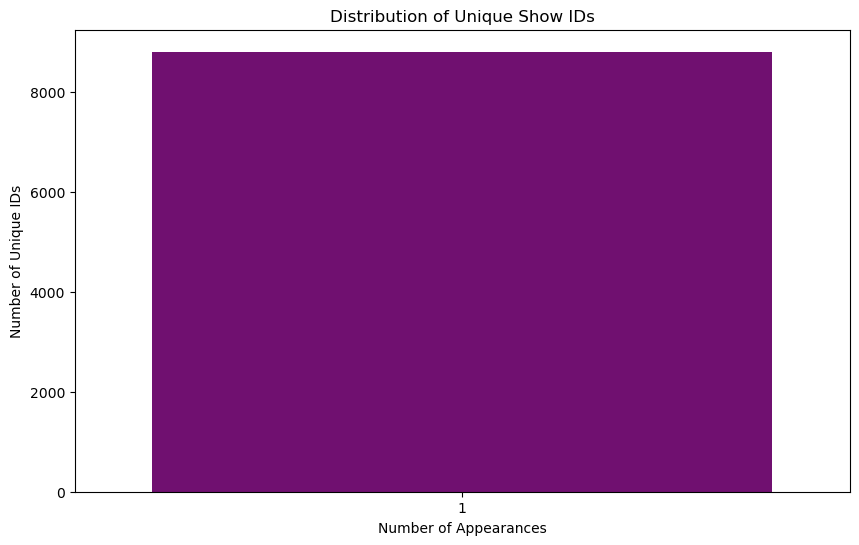

In [26]:
unique_show_ids = data['show_id'].nunique()
print(f"There are {unique_show_ids} unique show IDs.")

# Plot a count plot for the unique show IDs
show_id_counts = data['show_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=show_id_counts.values, color='purple')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Unique IDs')
plt.title('Distribution of Unique Show IDs')
plt.show()

In [27]:
 # What are the top 10 most common titles in the dataset?

Top 10 most common titles:
title
Dick Johnson Is Dead                1
Ip Man 2                            1
Hannibal Buress: Comedy Camisado    1
Turbo FAST                          1
Masha's Tales                       1
Chelsea Does                        1
Ricardo O'Farrill Abrazo Genial     1
Ip Man                              1
Tom Segura: Mostly Stories          1
Team Foxcatcher                     1
Name: count, dtype: int64


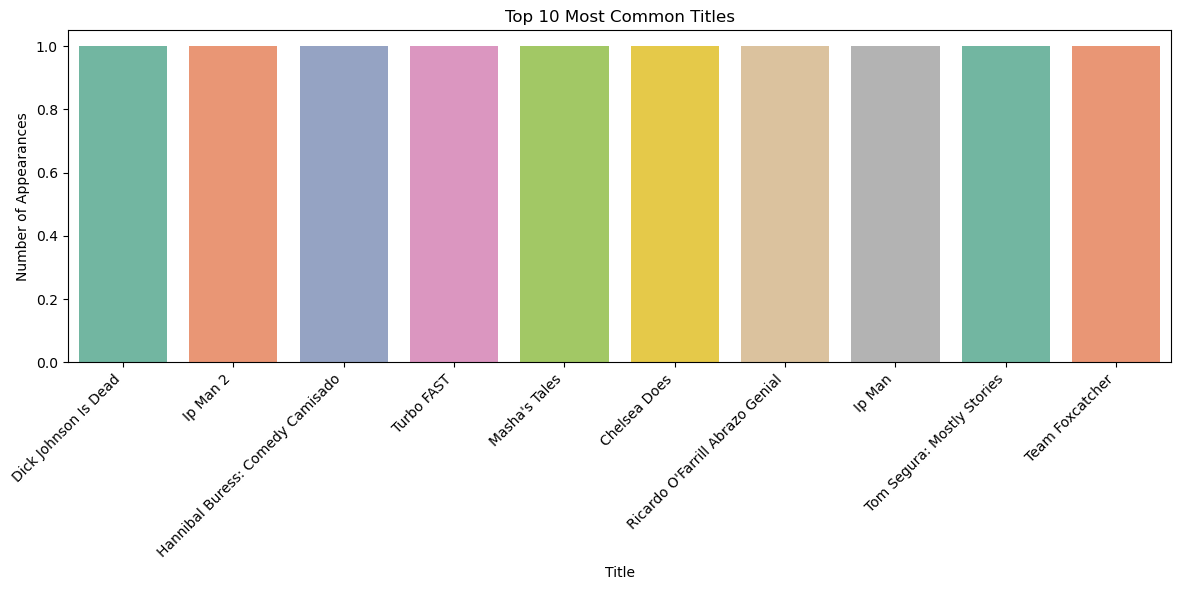

In [28]:
top_titles = data['title'].value_counts().head(10)
print("Top 10 most common titles:")
print(top_titles)

# Plot a bar plot for the top 10 most common titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='Set2')
plt.xlabel('Title')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Who are the top 10 directors with the most content?

Top 10 directors with the most content:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


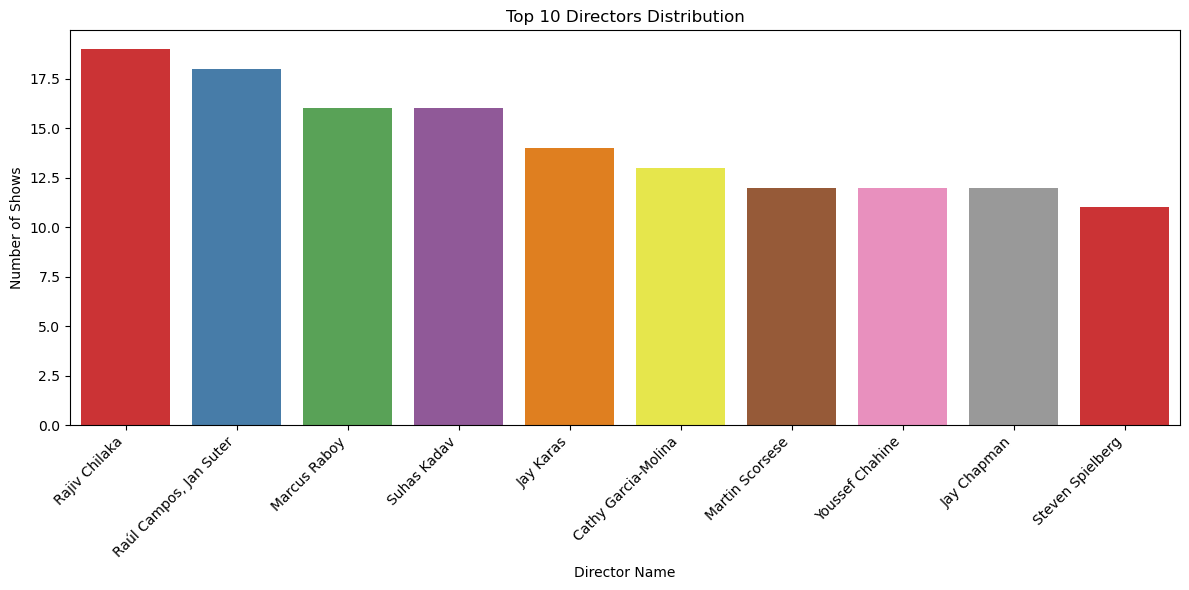

In [30]:
top_directors = data['director'].value_counts().head(10)
print("Top 10 directors with the most content:")
print(top_directors)

# Plot a bar plot for the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Who are the top 10 most common cast members?

Top 10 most common cast members:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Dora

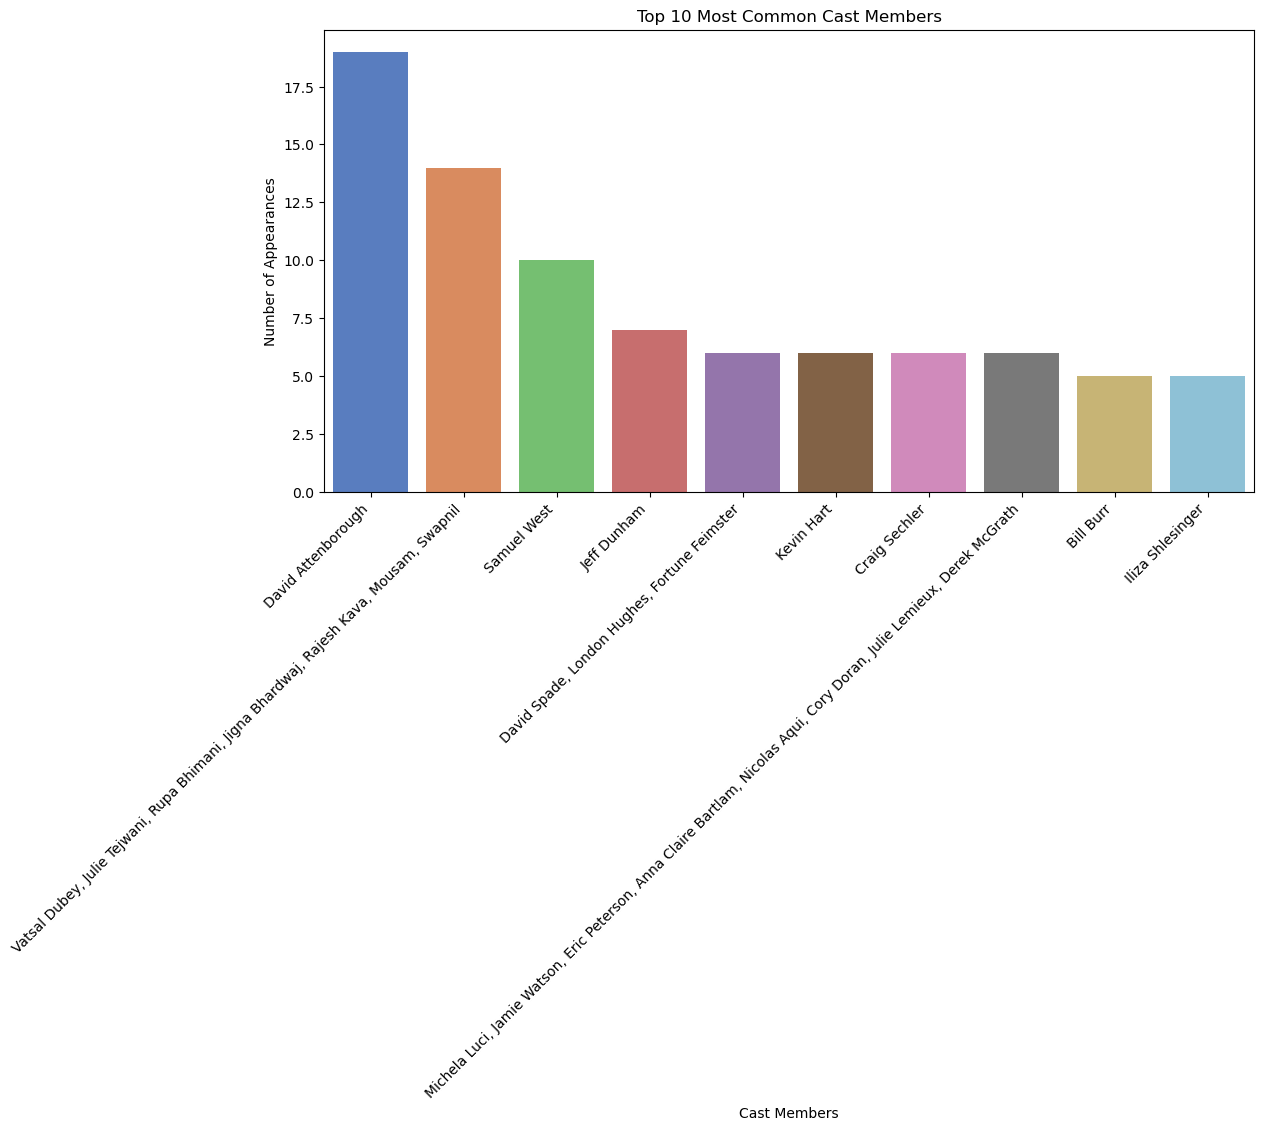

In [32]:
top_cast = data['cast'].value_counts().head(10)
print("Top 10 most common cast members:")
print(top_cast)

# Plot a bar plot for the top 10 most common cast members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.index, y=top_cast.values, palette='muted')
plt.xlabel('Cast Members')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Cast Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
#  Which countries are most represented in the dataset?

Top 10 countries represented in the dataset:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


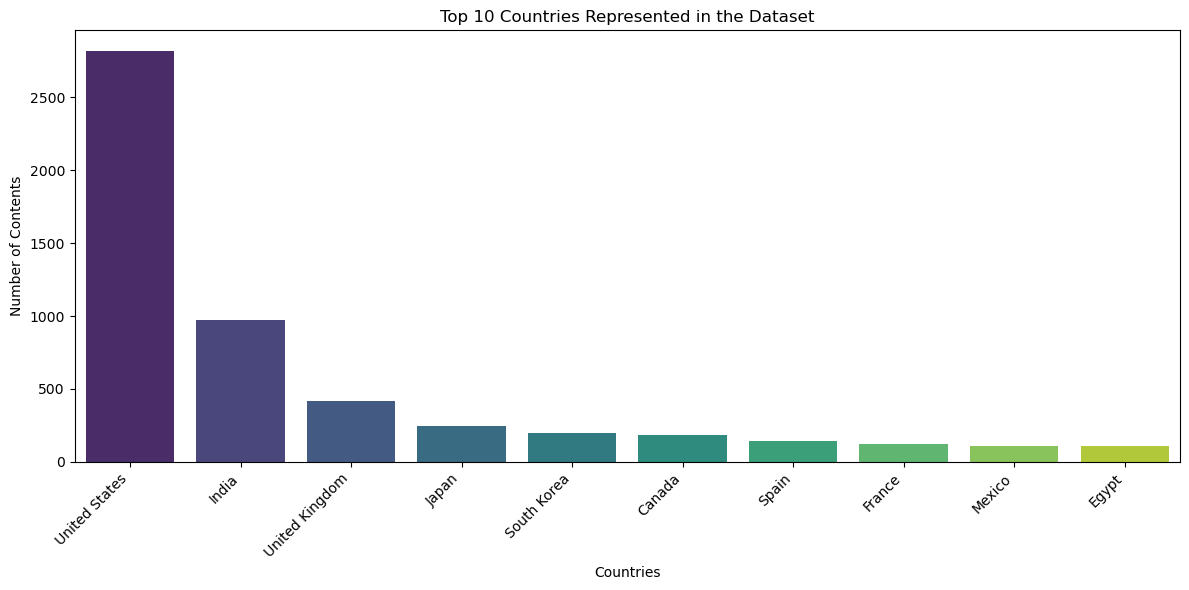

In [34]:
top_countries = data['country'].value_counts().head(10)
print("Top 10 countries represented in the dataset:")
print(top_countries)

# Plot a bar plot for the most represented countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='viridis')
plt.xlabel('Countries')
plt.ylabel('Number of Contents')
plt.title('Top 10 Countries Represented in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# What is the distribution of content added dates according year?

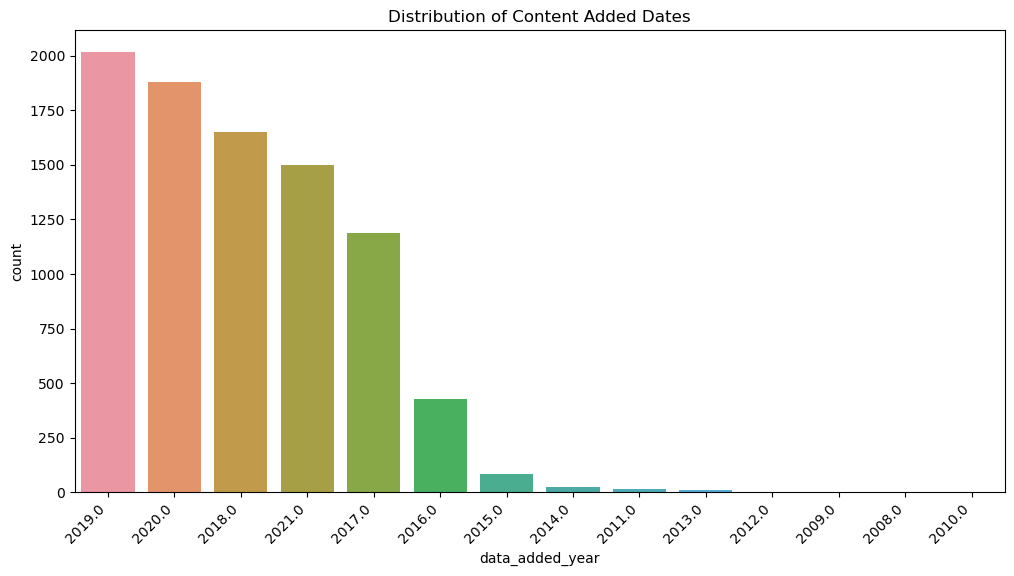

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_year', data=data, order=data['data_added_year'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [37]:
# What is the distribution of content added dates according month?

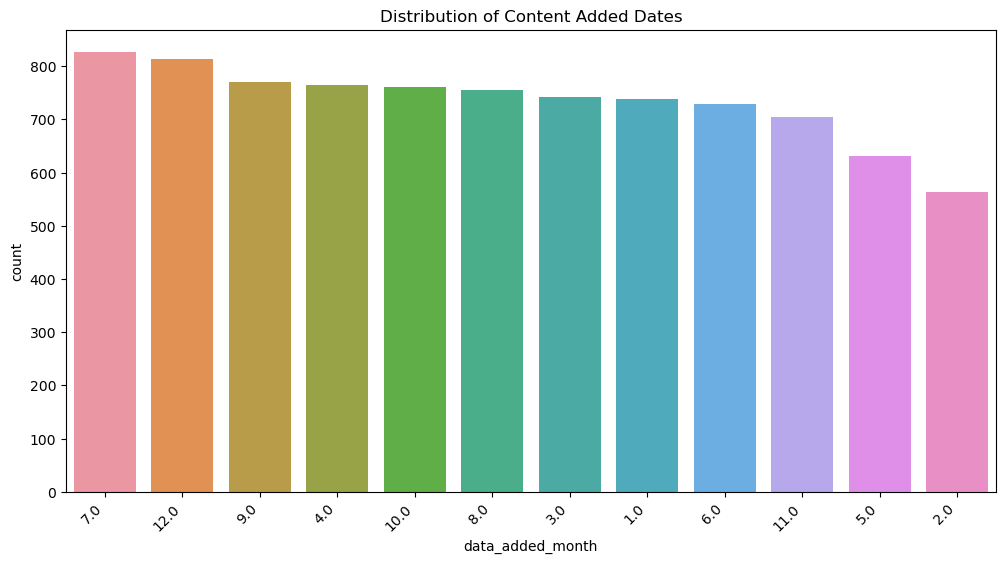

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_month', data=data, order=data['data_added_month'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [39]:
# What is the distribution of release years for content?

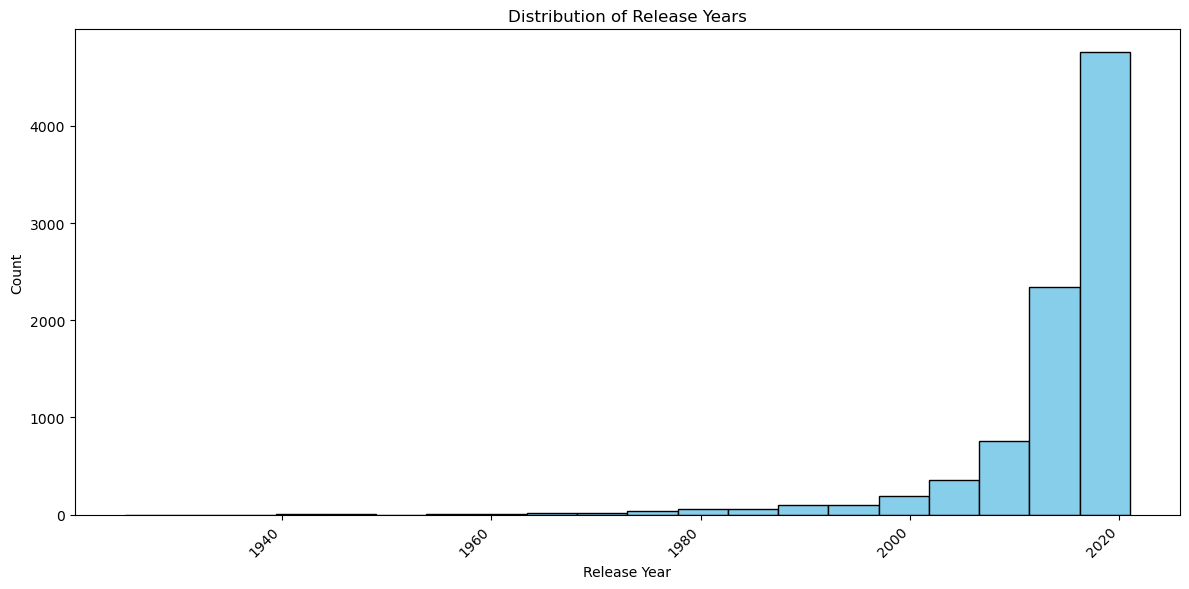

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(data['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
 # What is the distribution of content ratings?

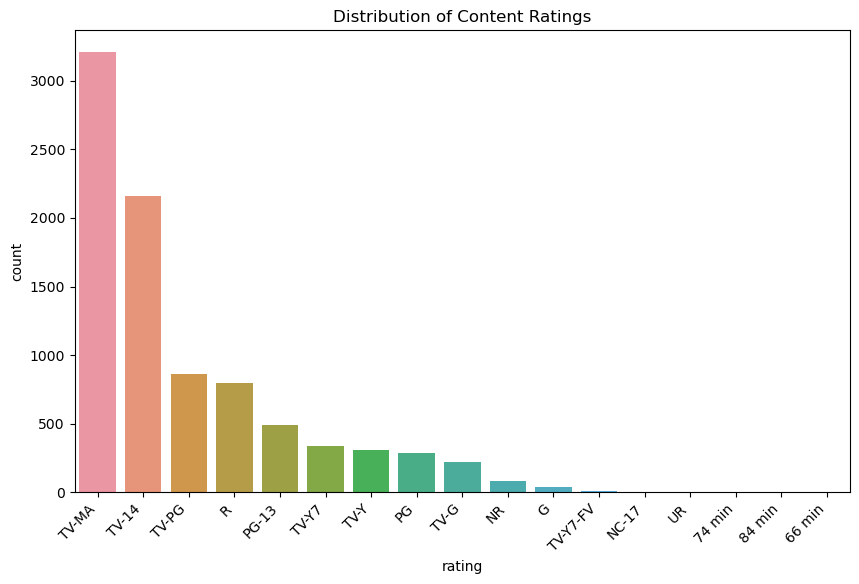

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# What is the distribution of content durations for movies and TV shows?

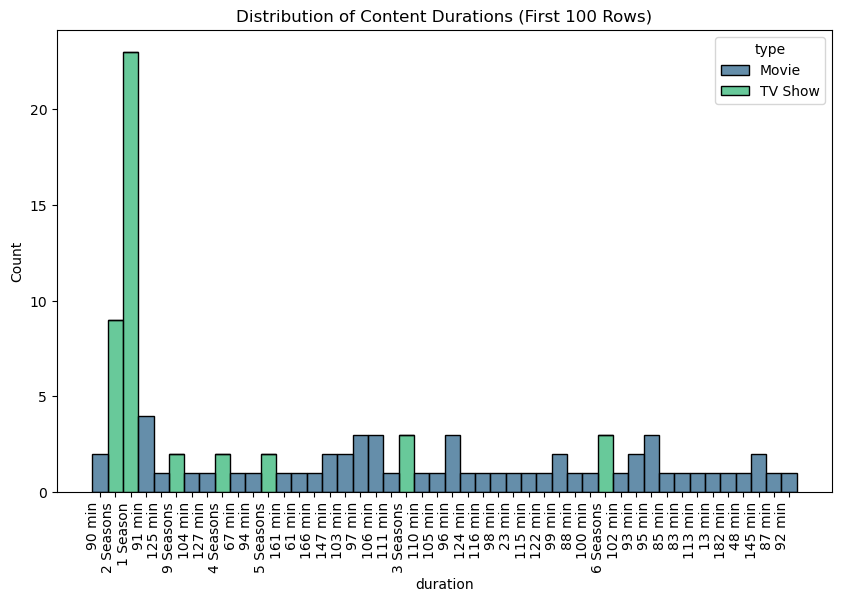

In [44]:
subset_data = data.head(100)

# Create a histogram plot for the distribution of content durations
plt.figure(figsize=(10, 6))
sns.histplot(x='duration', data=subset_data,multiple='stack', hue='type', bins=20, palette='viridis')
plt.title('Distribution of Content Durations (First 100 Rows)')
plt.xticks(rotation=90, ha='right')
plt.show() 

In [45]:
# What are the top 10 most common content categories?

Top 10 most common content categories:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


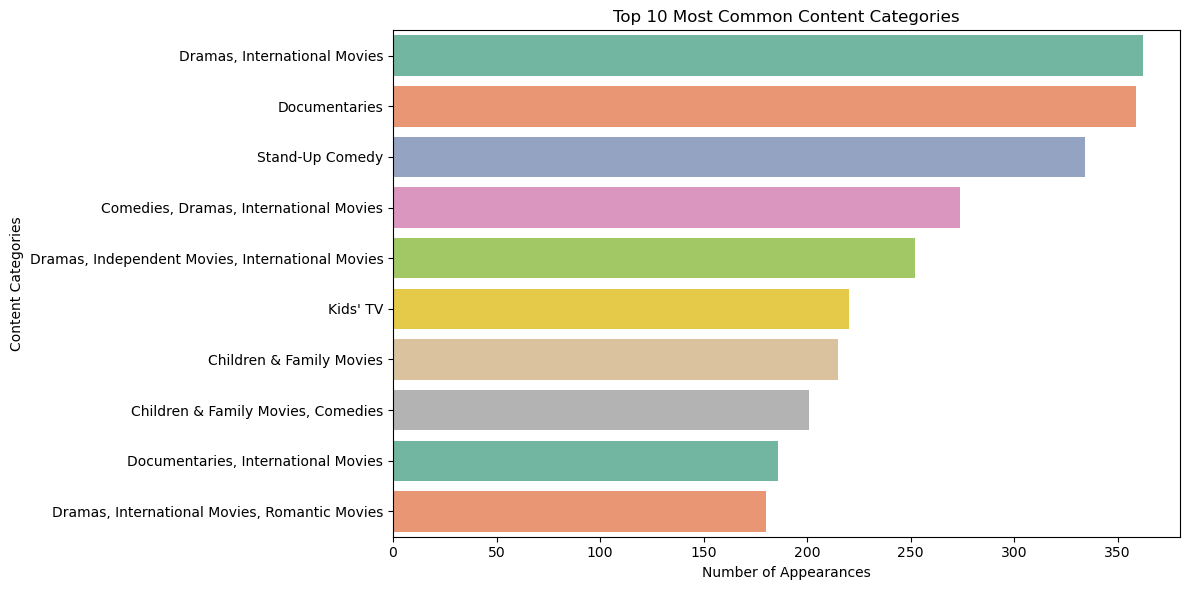

In [46]:
top_categories = data['listed_in'].value_counts().head(10)
print("Top 10 most common content categories:")
print(top_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.xlabel('Number of Appearances')
plt.ylabel('Content Categories')
plt.title('Top 10 Most Common Content Categories')
plt.tight_layout()
plt.show()

In [47]:
# What are the word frequencies in content descriptions?
# Most common words in Description 

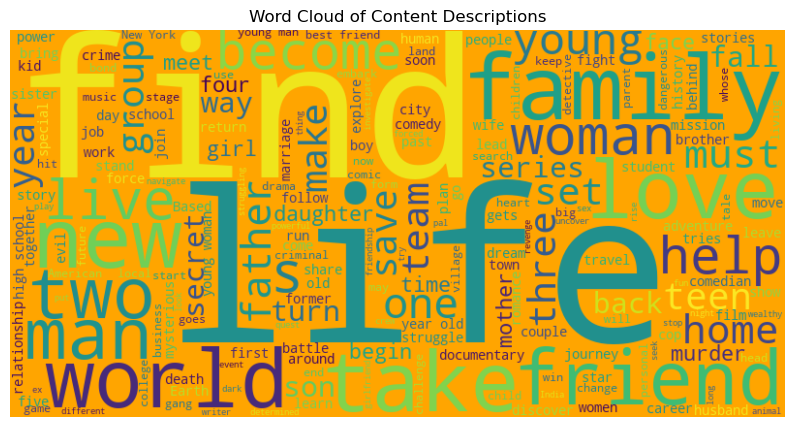

In [48]:
from wordcloud import WordCloud

text = ' '.join(data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions')
plt.show() 

In [49]:
# Plot the distribution of genres

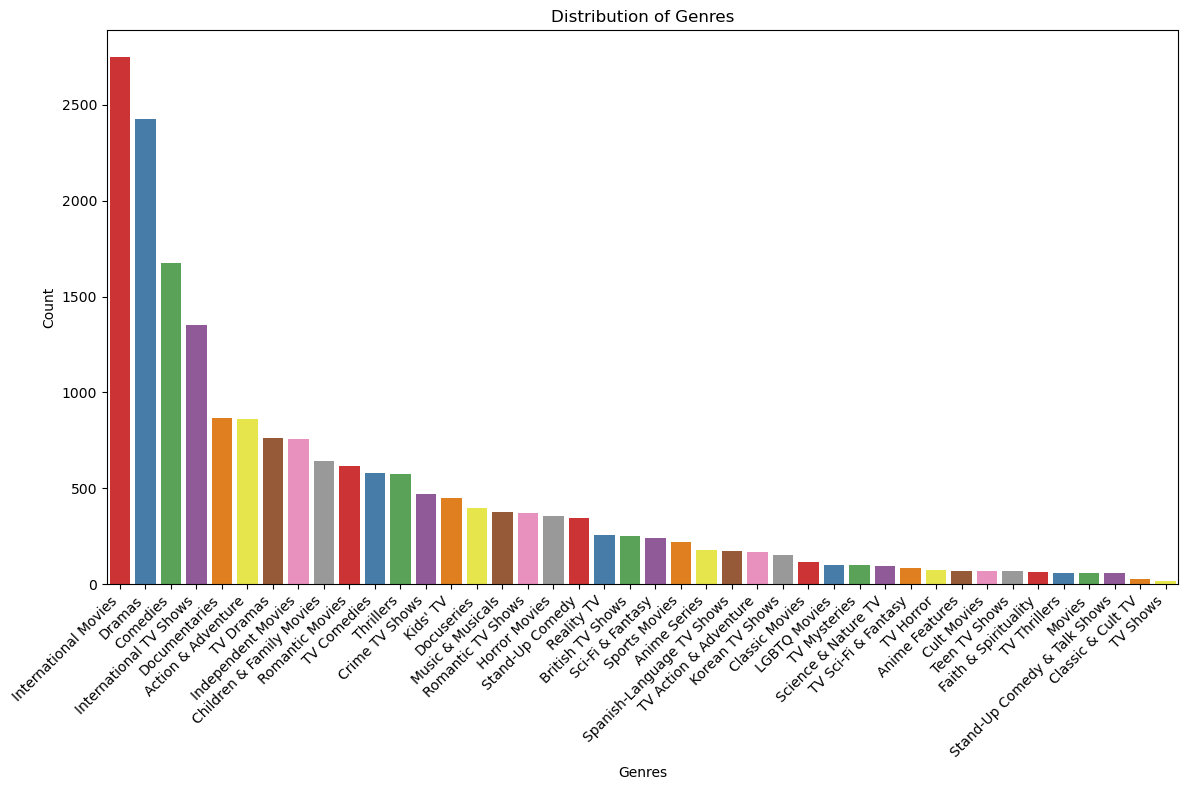

In [50]:
# Filter out non-string values and use explode to transform the 'genres' column
genre_counts = data['listed_in'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [51]:
# Top 10 Highest-Rated Shows/Movies

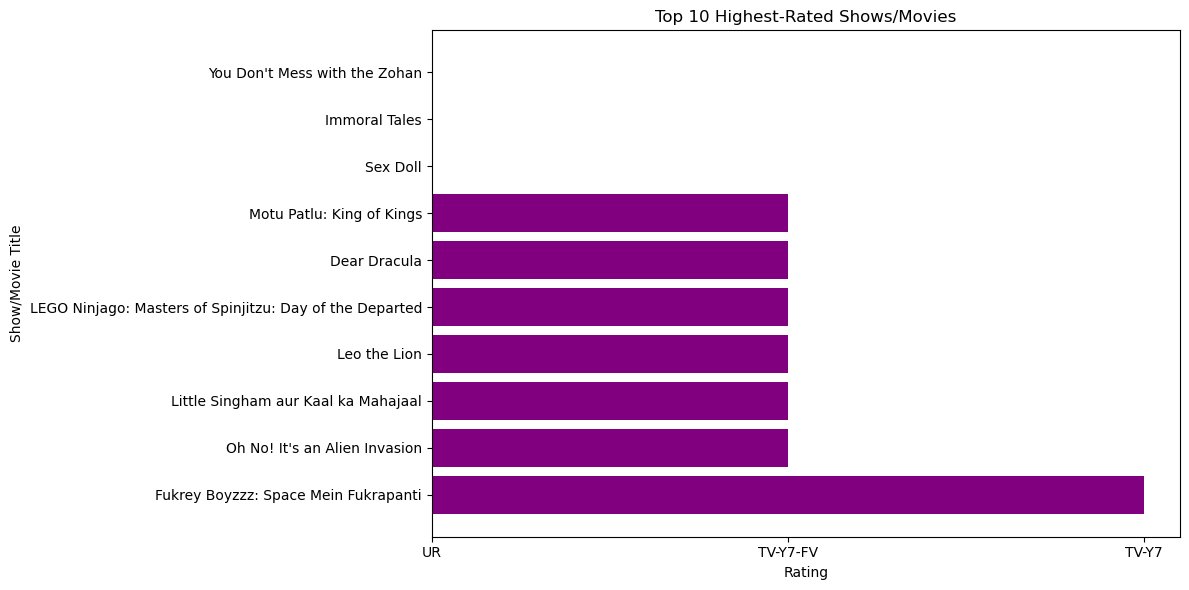

In [52]:
sorted_df = data.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(sorted_df['title'], sorted_df['rating'], color = 'purple')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top 10 Highest-Rated Shows/Movies')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Data Pre-processing or Cleaning

In [53]:
# Checking Duplicates Data

In [54]:
data.duplicated().sum()

0

In [55]:
"""
Observation
💡 We can observe that we don't have any duplicates values in our training datasets.
💡 So we dont have any type of Data Lekage in our DataSet.
"""

"\nObservation\n💡 We can observe that we don't have any duplicates values in our training datasets.\n💡 So we dont have any type of Data Lekage in our DataSet.\n"

In [56]:
# Checking Cardinality of Categorical features

In [57]:
data.select_dtypes(include='object').nunique()

show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
rating           17
duration        220
listed_in       514
description    8775
dtype: int64

In [58]:
"""
Observation
💡 We normally drop the features having high cardinality but in this project we will do Feature
Engineering and will create new features from this features.
💡 Because more amount of data leads to better predictions by model.
"""

'\nObservation\n💡 We normally drop the features having high cardinality but in this project we will do Feature\nEngineering and will create new features from this features.\n💡 Because more amount of data leads to better predictions by model.\n'

### Lets deal with missing values

In [59]:
data.isnull().sum() 

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
release_year           0
rating                 4
duration               3
listed_in              0
description            0
data_added_day        10
data_added_month      10
data_added_year       10
dtype: int64

In [60]:
# Checking Total Number & Percentage of Missing Values in Training Dataset

In [61]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)

In [62]:
"""
train_df.isnull().sum(): This counts the number of missing (NaN) values in each column of 
train_df.

[train_df.isnull().sum() > 0]: This filters the result to only include columns with more than 0 
missing values.

.to_frame(): This converts the filtered result into a DataFrame.

.rename(columns={0:'Number of Missing Values'}): This renames the column with index 0 to "Number of 
Missing Values".
"""

'\ntrain_df.isnull().sum(): This counts the number of missing (NaN) values in each column of \ntrain_df.\n\n[train_df.isnull().sum() > 0]: This filters the result to only include columns with more than 0 \nmissing values.\n\n.to_frame(): This converts the filtered result into a DataFrame.\n\n.rename(columns={0:\'Number of Missing Values\'}): This renames the column with index 0 to "Number of \nMissing Values".\n'

In [63]:
df

,Number of Missing Values,% of Missing Values
director,2634,29.91
cast,825,9.37
country,831,9.44
rating,4,0.05
duration,3,0.03
data_added_day,10,0.11
data_added_month,10,0.11
data_added_year,10,0.11


In [64]:
# Visualizing Missing Numbers

In [65]:
import missingno as msno

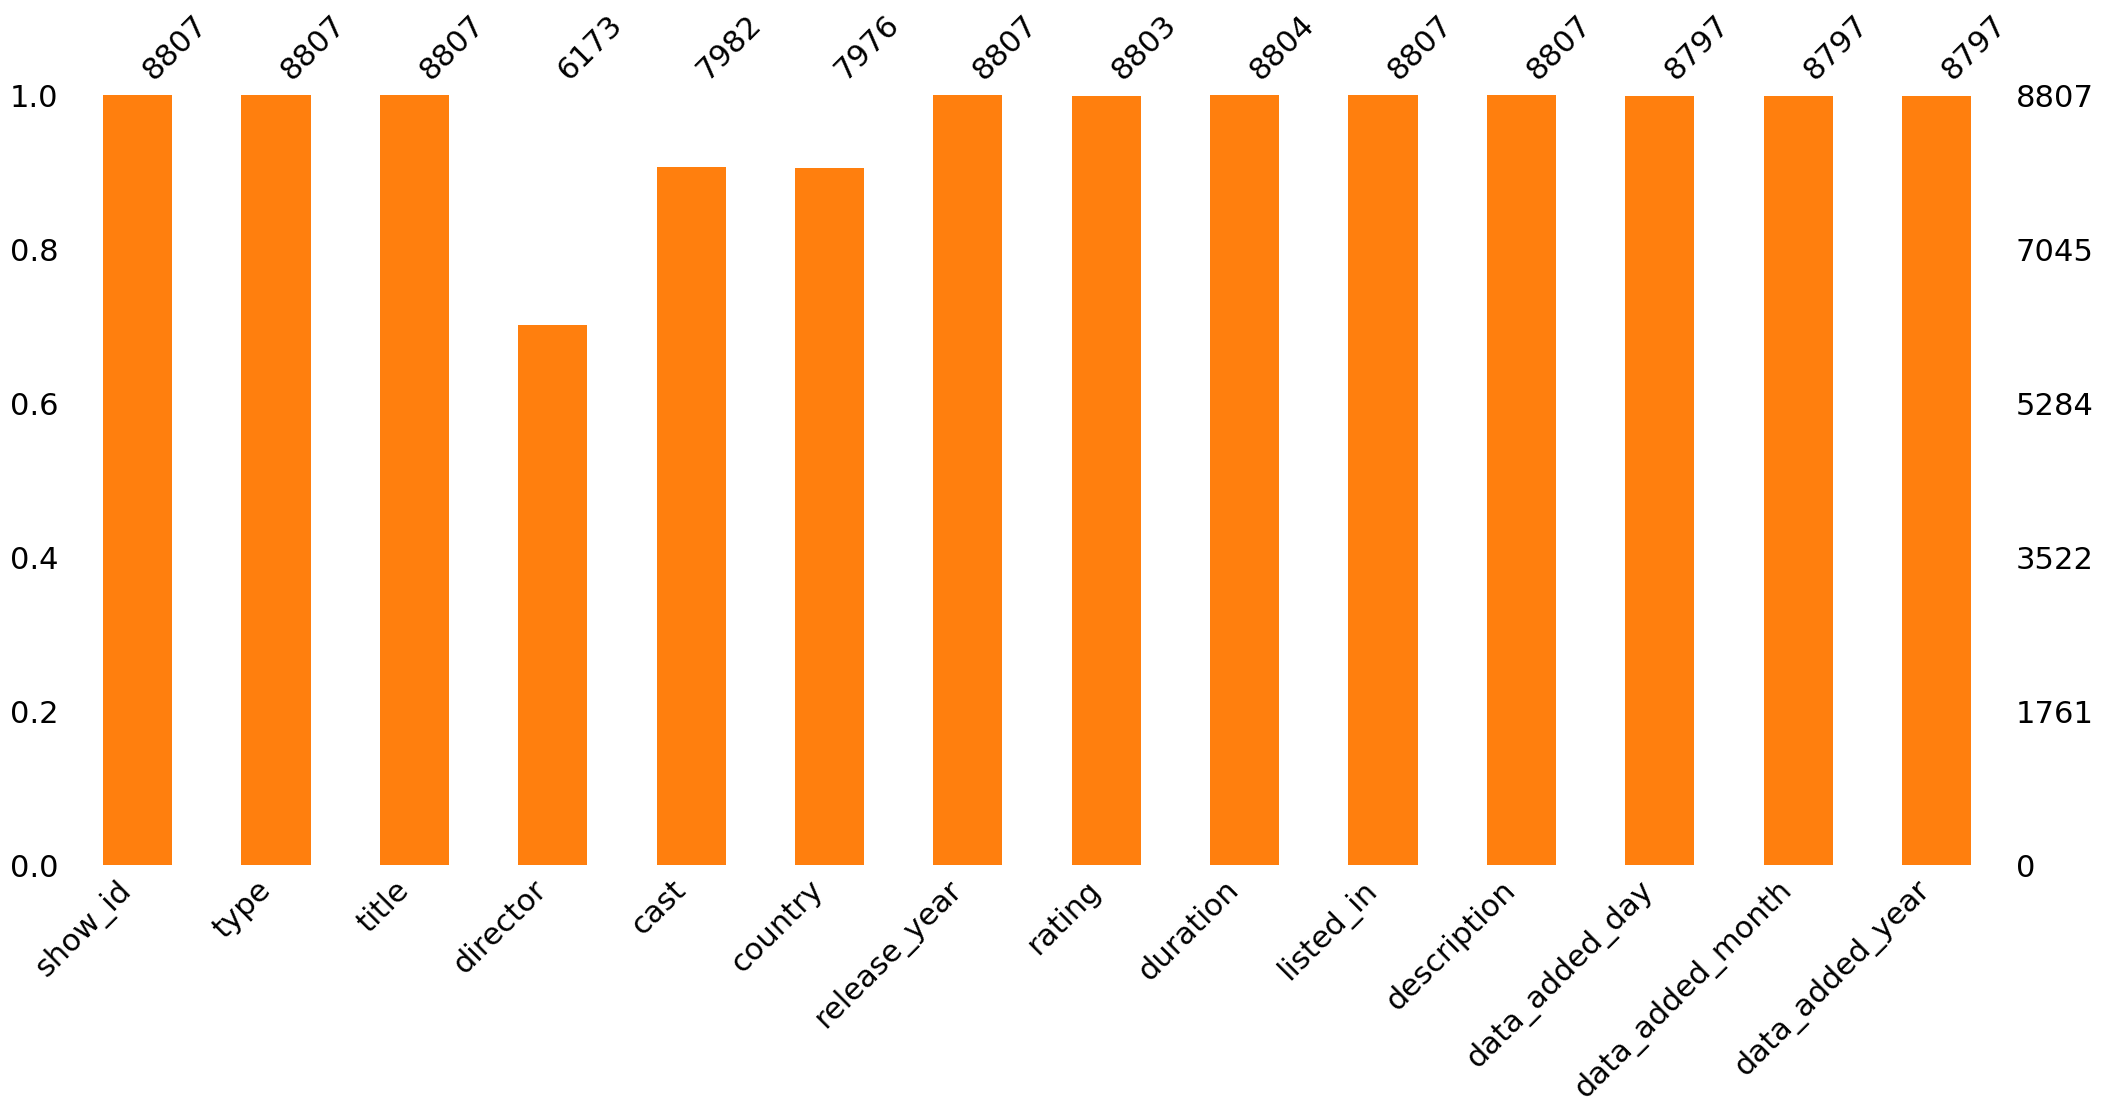

In [66]:
msno.bar(data, color='C1', fontsize=22)
plt.show()

In [67]:
# Another way to visualize missing Values

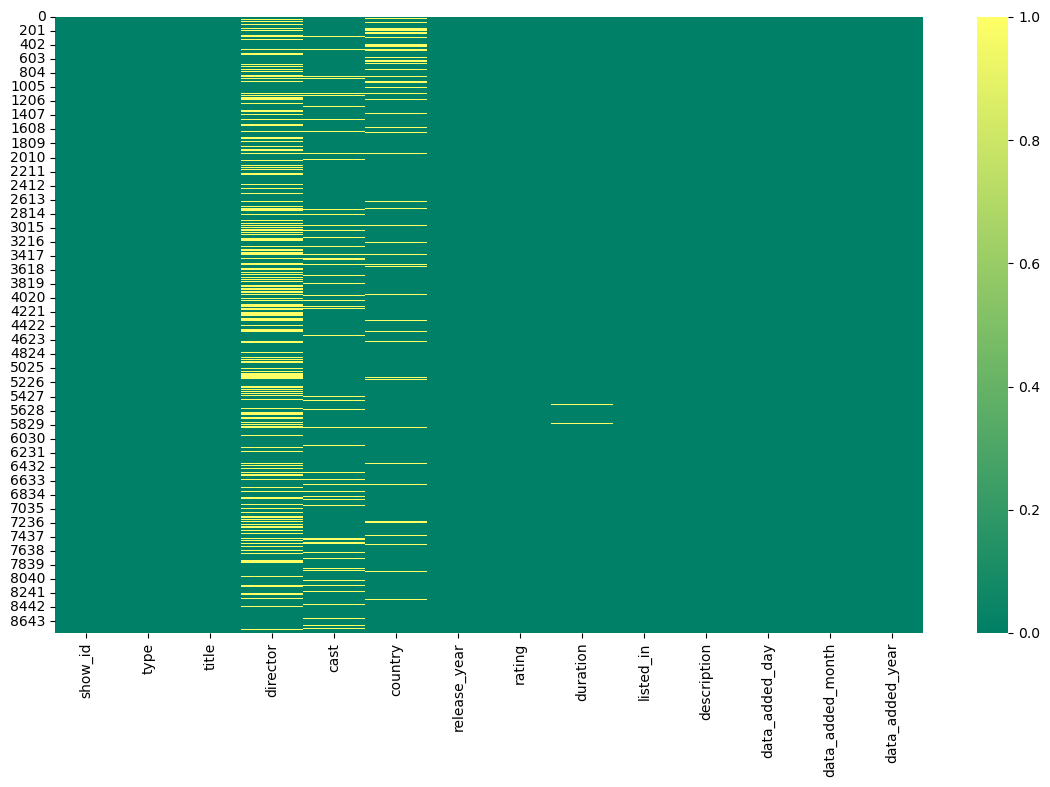

In [68]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cmap='summer')
plt.show()

In [69]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [70]:
# Handling Missing Values.

In [71]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [72]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [73]:
num_cols

['release_year', 'data_added_day', 'data_added_month', 'data_added_year']

In [74]:
# Using Simple Imputer Library to Fill Missing Values

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imputer1 = SimpleImputer(strategy="most_frequent")   ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [77]:
def fill_missing_no(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [78]:
fill_missing_no(data)

In [79]:
# Missing numbers left in train_df

In [80]:
data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_added_day      0
data_added_month    0
data_added_year     0
dtype: int64

### Feature Encoding

In [81]:
# For Nominal data(have No order)  ==> One hot encoding
# For Ordinal data(have order) ==> Label enconding

In [82]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [83]:
num_cols

['release_year', 'data_added_day', 'data_added_month', 'data_added_year']

In [84]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [85]:
data['show_id'].nunique() # Label encoding

8807

In [86]:
data['type'].nunique() # Label encoding

2

In [87]:
data['title'].nunique() # Target guided encoding

8807

In [88]:
data['director'].nunique() # Target guided encoding

4528

In [89]:
data['cast'].nunique() # Target guided encoding

7692

In [90]:
data['country'].nunique() # Target guided encoding

748

In [91]:
data['rating'].nunique() # Target guided encoding

17

In [92]:
data['duration'].nunique() # Target guided encoding

220

In [93]:
data['listed_in'].nunique() # Target guided encoding

514

In [94]:
data['description'].nunique() # Target guided encoding

8775

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le = LabelEncoder()
for col in ['show_id', 'type']:  # Label Encoding
    data[col] = le.fit_transform(data[col])

In [97]:
data.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,1111,1,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,2222,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0


In [98]:
data.dtypes

show_id               int32
type                  int32
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [99]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [100]:
target_guided_encoding('title', 'type')

In [101]:
target_guided_encoding('director', 'type')

In [102]:
target_guided_encoding('cast', 'type')

In [103]:
target_guided_encoding('country', 'type')

In [104]:
target_guided_encoding('rating', 'type')

In [105]:
target_guided_encoding('duration', 'type')

In [106]:
target_guided_encoding('listed_in', 'type')

In [107]:
target_guided_encoding('description', 'type')

In [108]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913,25.0,9.0,2021.0
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914,24.0,9.0,2021.0
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707,24.0,9.0,2021.0
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546,24.0,9.0,2021.0
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167,24.0,9.0,2021.0


### Lets Perform outlier detection !

In [109]:
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

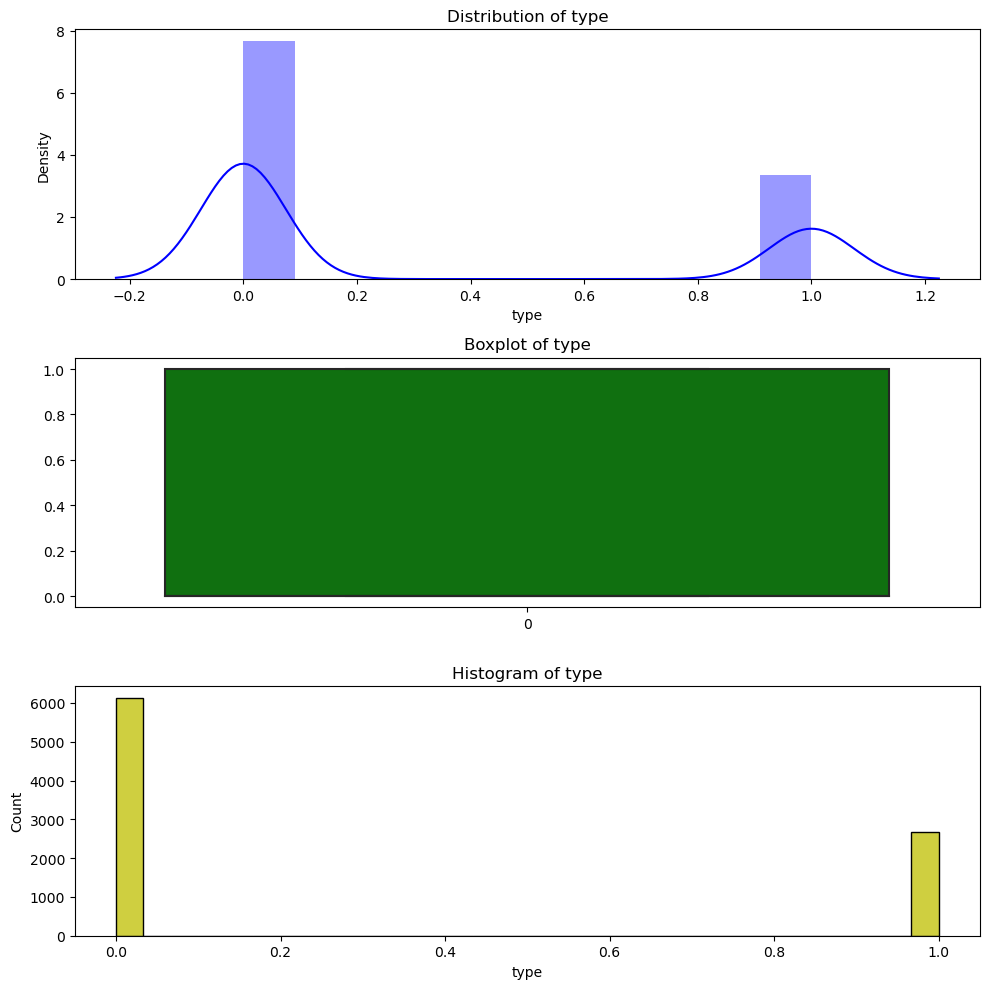

In [110]:
plot(data, 'type')

In [111]:
q1 = data['type'].quantile(0.25)
q3 = data['type'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [112]:
maximum

2.5

In [113]:
minimum

-1.5

In [114]:
[x for x in data['type'] if x> maximum or x<minimum] 

[]

In [115]:
len([x for x in data['type'] if x> maximum or x<minimum]) # so, no outlier

0

### Lets Perform feature selection

In [116]:
X = data.drop(['type'] , axis=1)

In [117]:
y = data['type']

In [118]:
from sklearn.feature_selection import mutual_info_regression

In [119]:
imp = mutual_info_regression(X, y)

In [120]:
imp

array([0.04507245, 0.613977  , 0.51923412, 0.53720642, 0.09194098,
       0.02369211, 0.07597651, 0.61556036, 0.62205744, 0.61359947,
       0.        , 0.00591547, 0.00077103])

In [121]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [122]:
imp_df

,0
show_id,0.045072
title,0.613977
director,0.519234
cast,0.537206
country,0.091941
release_year,0.023692
rating,0.075977
duration,0.615560
listed_in,0.622057
description,0.613599


In [123]:
imp_df.columns = ['importance']

In [124]:
imp_df

,importance
show_id,0.045072
title,0.613977
director,0.519234
cast,0.537206
country,0.091941
release_year,0.023692
rating,0.075977
duration,0.615560
listed_in,0.622057
description,0.613599


In [125]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
listed_in,0.622057
duration,0.615560
title,0.613977
description,0.613599
cast,0.537206
director,0.519234
country,0.091941
rating,0.075977
show_id,0.045072
release_year,0.023692


In [126]:
data.drop(['data_added_day', 'data_added_month'], axis = 1, inplace = True)

In [127]:
data.dtypes

show_id              int32
type                 int32
title                int64
director             int64
cast                 int64
country              int64
release_year       float64
rating               int64
duration             int64
listed_in            int64
description          int64
data_added_year    float64
dtype: object

In [128]:
data['type'].unique()

array([0, 1])

### Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
X_scaled

array([[-1.73185415,  0.01652007, -1.41849562, ...,  1.26521696,
         0.68267933,  1.35257903],
       [-1.29485893,  1.51394654,  1.01285732, ...,  1.16401661,
         0.68267933,  1.35257903],
       [-0.85786371,  1.15011164,  0.99229909, ...,  1.16401661,
         0.68267933,  1.35257903],
       ...,
       [ 1.67954059, -0.78431006, -0.78598751, ..., -1.16359145,
         1.26501812,  0.08133806],
       [ 1.67993393, -0.78509673, -1.74811252, ..., -0.15158794,
        -1.64667583,  0.71695854],
       [ 1.68032726, -0.78667007, -1.81321357, ..., -1.0623911 ,
        -1.06433704,  0.08133806]])

### Lets Build ML model

### split dataset into train & test

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Splitting Data For Model Which Don't Need Scaled Data.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [134]:
X_train

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
8279,8090,3500,2782,5278,593,2015.0,12,63,91,2964,1.0,8.0,2018.0
4671,4081,3077,2095,38,607,2017.0,12,72,160,3622,1.0,9.0,2018.0
2303,1451,6565,4353,5856,593,2020.0,12,205,336,8584,2.0,7.0,2020.0
4058,3400,33,3856,4020,595,2014.0,14,65,274,231,1.0,3.0,2019.0
2777,1976,6916,4353,5757,590,2020.0,12,205,314,6459,26.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5262,668,228,3542,593,2016.0,15,19,114,719,1.0,11.0,2016.0
5191,4659,8384,4353,5623,593,2010.0,12,205,314,7589,1.0,11.0,2017.0
5390,4880,7159,4353,6951,646,2014.0,11,205,482,6306,1.0,7.0,2017.0
860,8456,6062,2275,5421,632,2020.0,12,69,22,2774,20.0,5.0,2021.0


In [135]:
X_train.shape

(6605, 13)

In [136]:
y_train.shape

(6605,)

In [137]:
X_test.shape

(2202, 13)

In [138]:
y_test.shape

(2202,)

In [139]:
# Splitting Data For Model Which Need Scaled Data.

In [140]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [141]:
X_train1

array([[ 1.45022627, -0.35518153, -0.06370848, ..., -1.16359145,
         0.39150993, -0.55428243],
       [-0.12665388, -0.52156225, -0.53449187, ..., -1.16359145,
         0.68267933, -0.55428243],
       [-1.16112502,  0.85039034,  1.01285732, ..., -1.0623911 ,
         0.10034054,  0.71695854],
       ...,
       [ 0.18762081,  1.08403135,  1.01285732, ..., -1.16359145,
         0.10034054, -1.18990291],
       [ 1.59418689,  0.65254282, -0.41114251, ...,  0.75921521,
        -0.48199825,  1.35257903],
       [ 1.0092977 , -1.34441914,  0.55372359, ..., -1.16359145,
         0.39150993,  0.08133806]])

In [142]:
X_train1.shape

(6605, 13)

In [143]:
y_train1.shape

(6605,)

In [144]:
X_test1.shape

(2202, 13)

In [145]:
y_test1.shape

(2202,)

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
ml_model = RandomForestRegressor()

In [148]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [149]:
y_pred = ml_model.predict(X_test)

In [150]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [151]:
from sklearn import metrics

In [152]:
metrics.r2_score(y_test , y_pred)

0.9999335041636243

### Define  Evaluation metric..

### how to make our own metric...

In [153]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   

In [154]:
mape(y_test, y_pred)

nan

### How to automate ml pipeline !

### Model Building For Scaled Data

In [155]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [156]:
evaluation_results = [] 

In [157]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')
    
    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Printing predictions
    print(f'Predictions are : {y_prediction}')
    print('\n')
    
    # Calculating and printing evaluation metrics
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    print(f'MAPE : {mape(y_test, y_prediction)}')
    
    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction)}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction)}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction)}")
    
    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

In [158]:
# 1. Logistic-Regression Model

In [159]:
from sklearn.linear_model import LogisticRegression

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


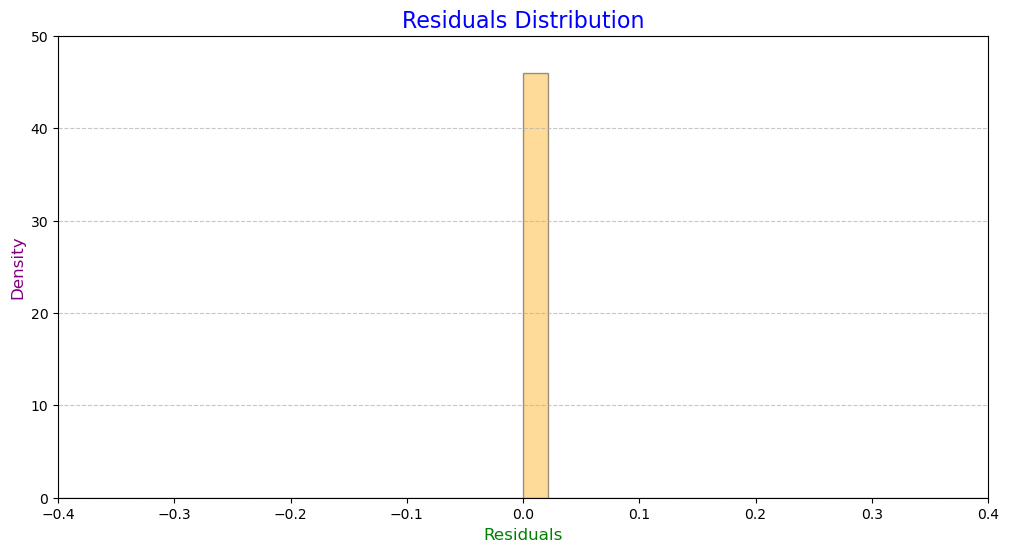


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


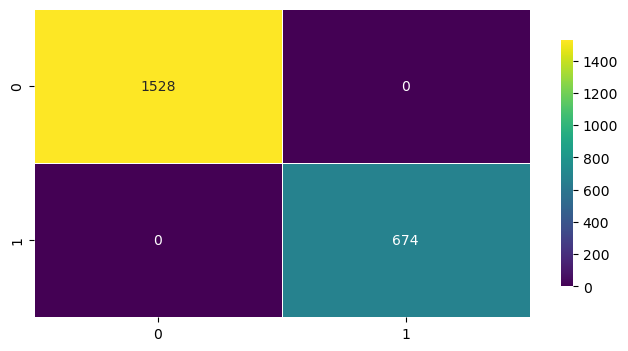

In [160]:
evaluate_model(LogisticRegression(),'Logistic Regression', X_train1, y_train1, X_test1, y_test1)

In [161]:
# 2. KNeighborsClassifier Model

In [162]:
from sklearn.neighbors import KNeighborsClassifier

Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


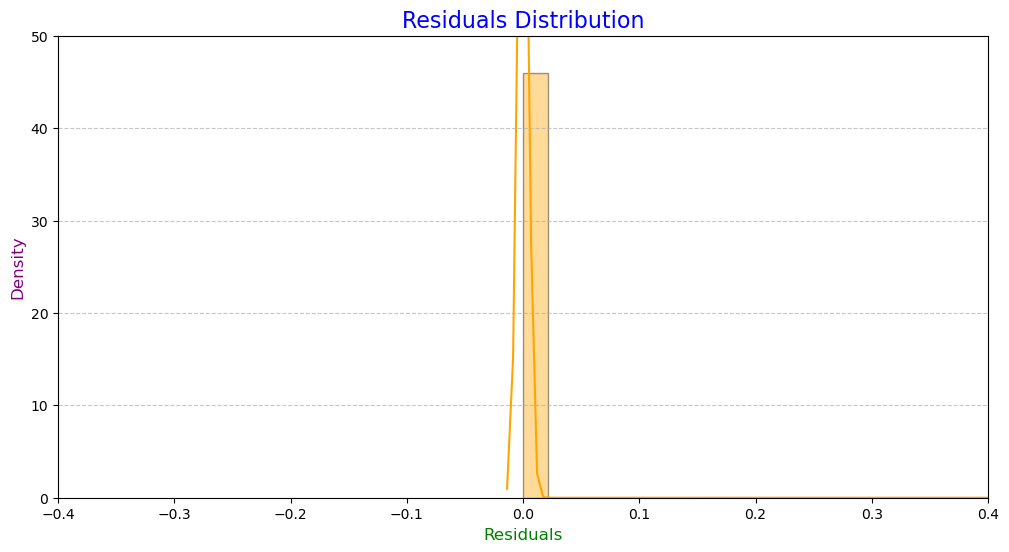


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025985

------------------------------------------------------------------------
Confusion Matrix:


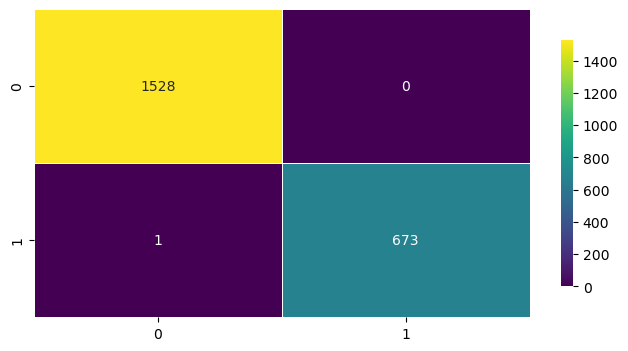

In [163]:
evaluate_model(KNeighborsClassifier(), 'KNN', X_train1, y_train1, X_test1, y_test1)

In [164]:
# 3. Support-Vector-Classifier Model

In [165]:
from sklearn.svm import SVC

Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


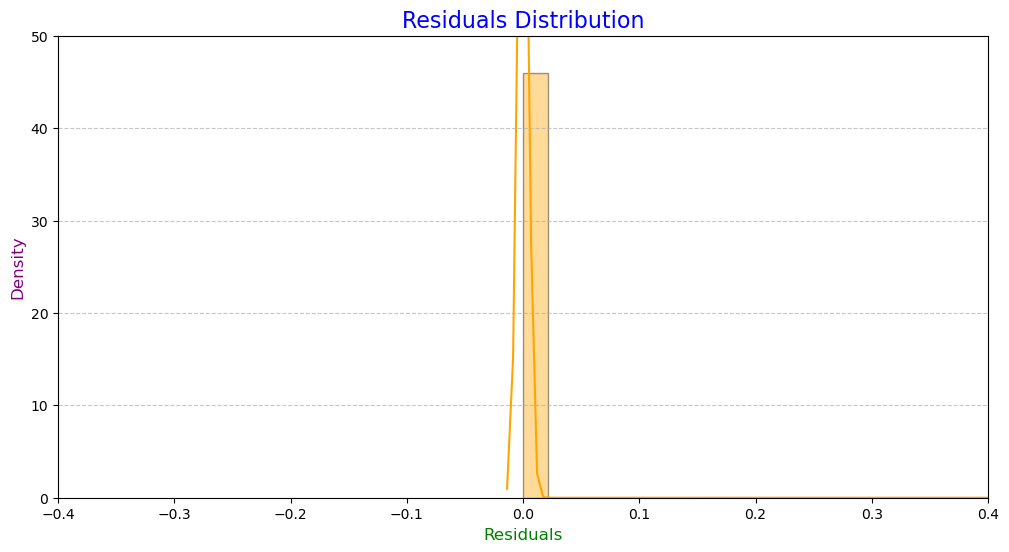


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025985

------------------------------------------------------------------------
Confusion Matrix:


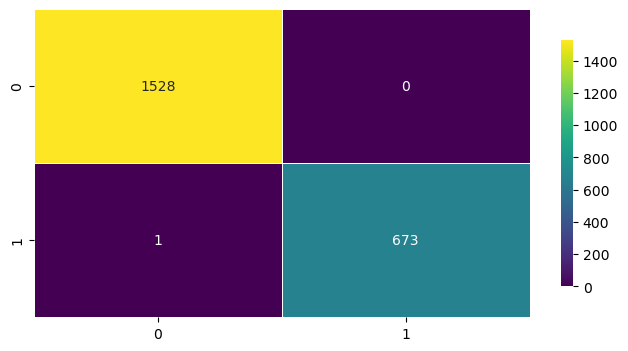

In [166]:
evaluate_model(SVC(), 'SVM', X_train1, y_train1, X_test1, y_test1)

In [167]:
# 4. Naive-Bayes Model

In [168]:
from sklearn.naive_bayes import GaussianNB

Training score : 0.9993943981831945
Testing score : 0.9990917347865577
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9957237404259947
MAE : 0.0009082652134423251
MSE : 0.0009082652134423251
RMSE : 0.030137438733945608
MAPE : nan


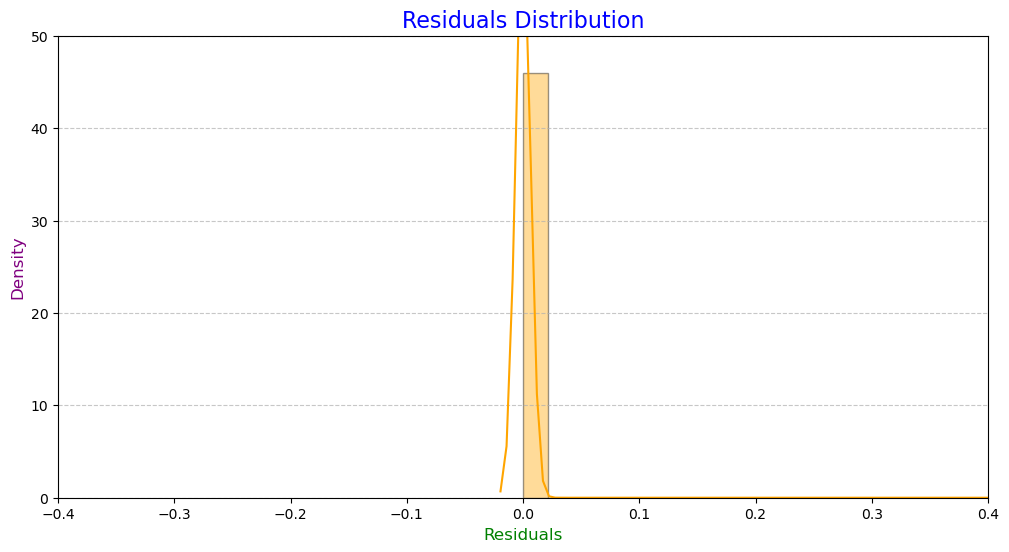


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.91%
Precision Score is: 1.0
Recall Score is: 0.9970326409495549
F1 Score is: 0.9985141158989599

------------------------------------------------------------------------
Confusion Matrix:


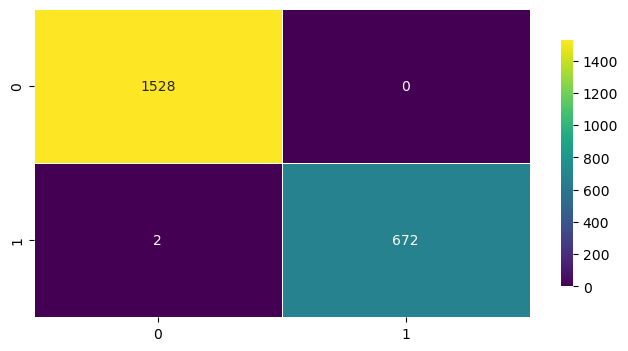

In [169]:
evaluate_model(GaussianNB(), 'Naive Bayes', X_train1, y_train1, X_test1, y_test1)

### Model Building For Un-Scaled Data

In [170]:
# 5. Decision-Tree-Classifier Model

In [171]:
from sklearn.tree import DecisionTreeClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


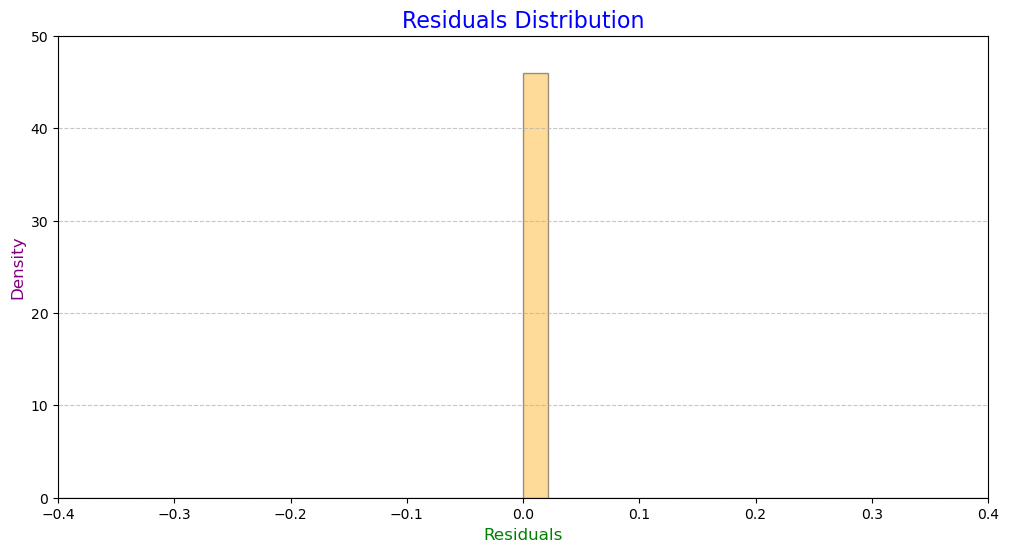


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


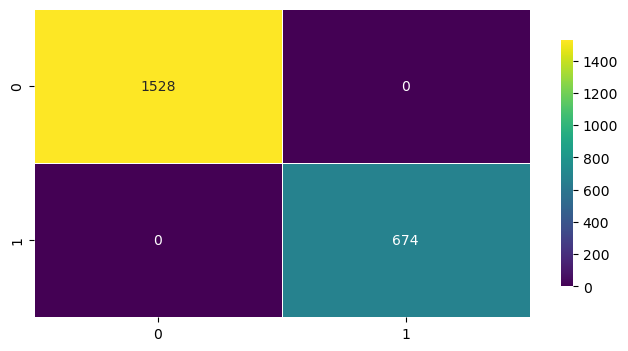

In [172]:
evaluate_model(DecisionTreeClassifier(), 'Descision Tree', X_train, y_train, X_test, y_test)

In [173]:
# 6. Random-Forest-Classifier Model

In [174]:
from sklearn.ensemble import RandomForestClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


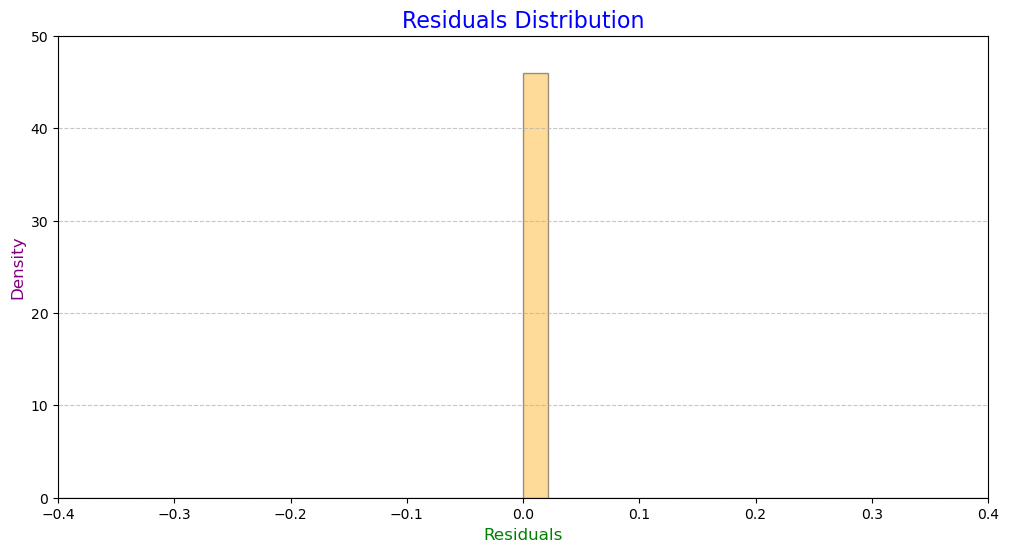


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


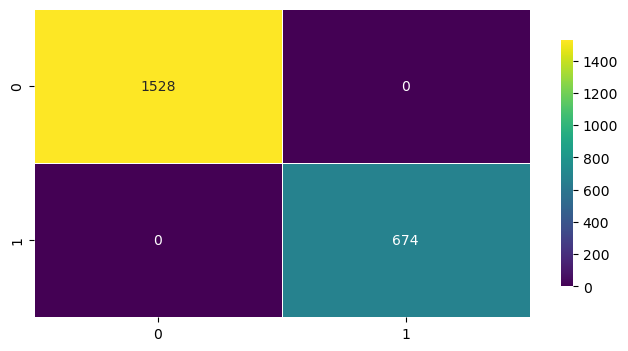

In [175]:
evaluate_model(RandomForestClassifier(), 'Random Forest', X_train, y_train, X_test, y_test)

In [176]:
# 7. Ada-Boost-Classifier Model

In [177]:
from sklearn.ensemble import AdaBoostClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


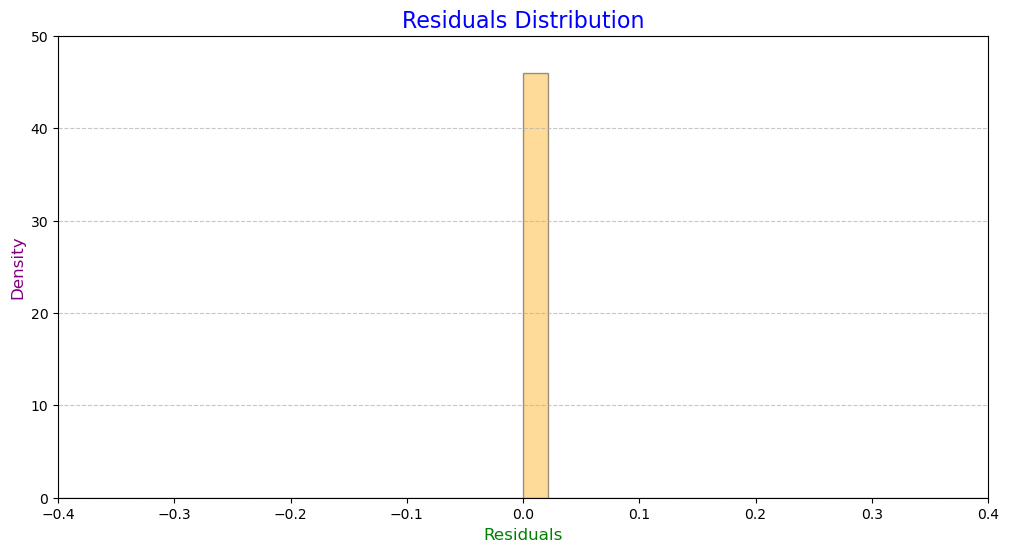


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


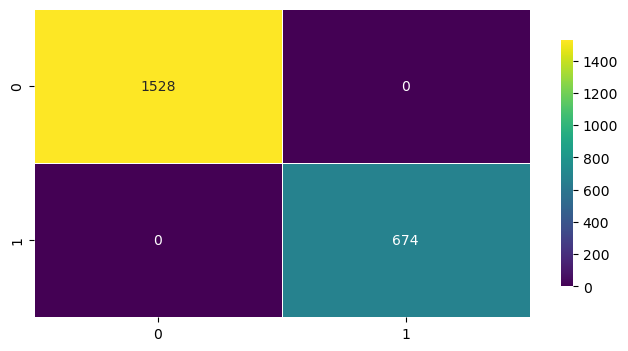

In [178]:
evaluate_model(AdaBoostClassifier(), 'Ada Boost', X_train, y_train, X_test, y_test)

In [179]:
# 8. Gradient-Boosting-Classifier Model

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


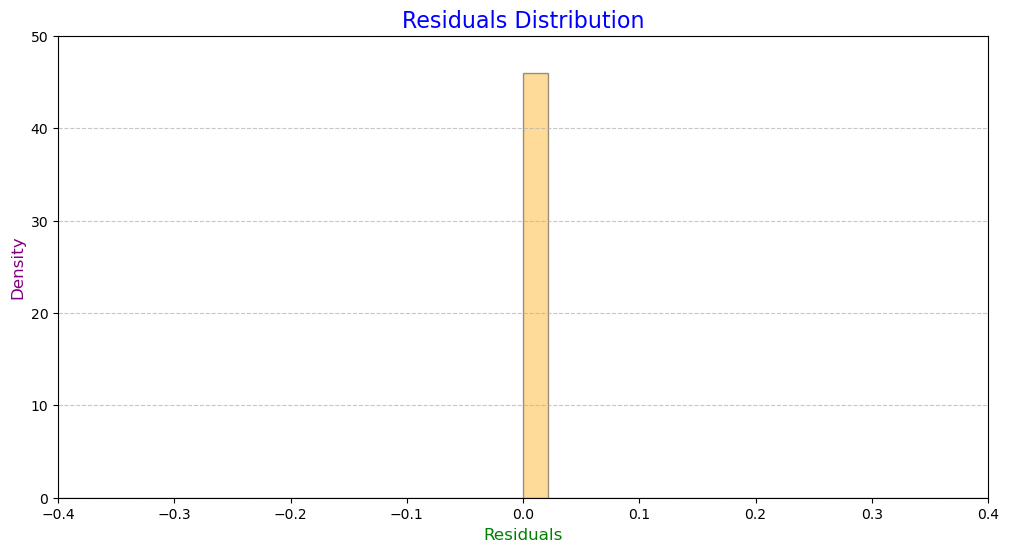


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


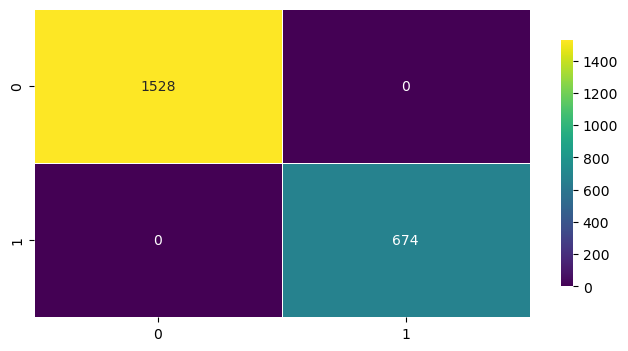

In [181]:
evaluate_model(GradientBoostingClassifier(), 'Gradient Boost', X_train, y_train, X_test, y_test)

In [182]:
# 9. LGMB Classifier Model

In [183]:
from lightgbm import LGBMClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


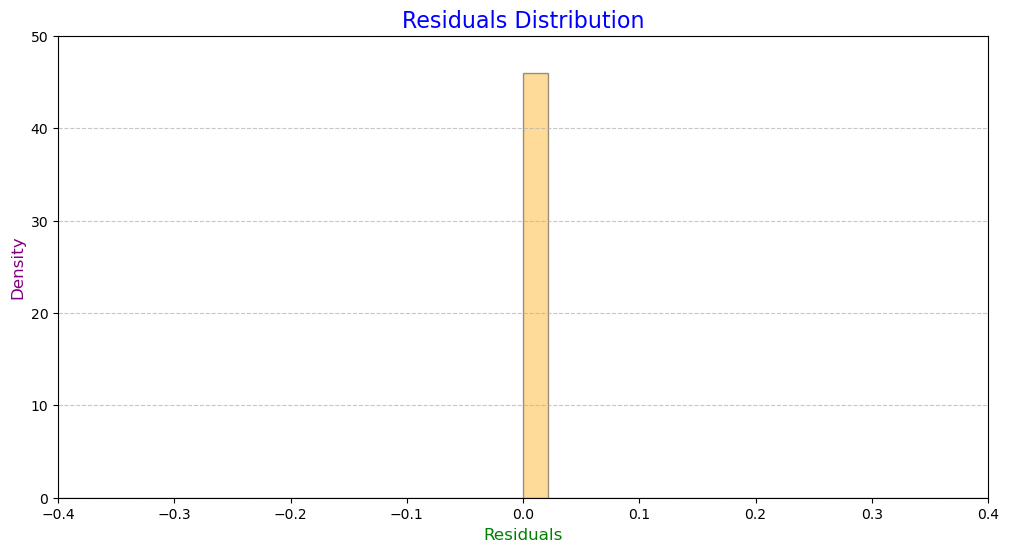


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


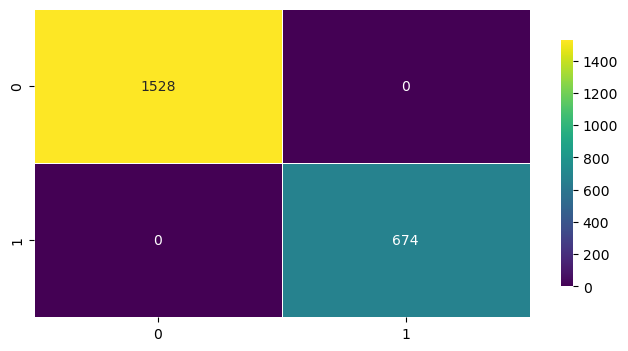

In [184]:
evaluate_model(LGBMClassifier(),'LGBM', X_train, y_train, X_test, y_test)

In [185]:
# 10. XGBClassifier Model

In [186]:
from xgboost import XGBClassifier

Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


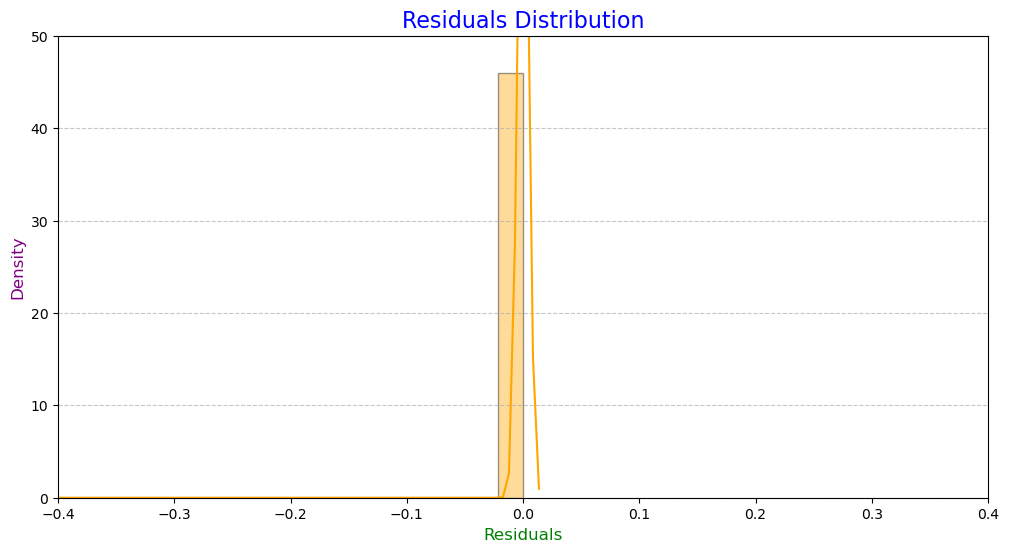


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 0.9985185185185185
Recall Score is: 1.0
F1 Score is: 0.9992587101556708

------------------------------------------------------------------------
Confusion Matrix:


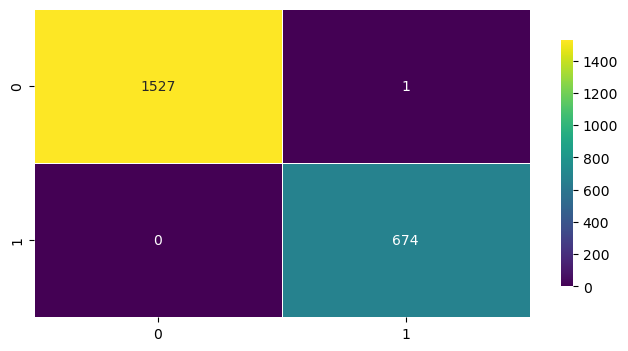

In [187]:
evaluate_model(XGBClassifier(),'XG Boost', X_train, y_train, X_test, y_test)

In [188]:
# 11. Cat-Boost-Classifier Model

In [189]:
from catboost import CatBoostClassifier

Learning rate set to 0.023069
0:	learn: 0.6120724	total: 153ms	remaining: 2m 32s
1:	learn: 0.5400585	total: 156ms	remaining: 1m 17s
2:	learn: 0.4775293	total: 159ms	remaining: 52.8s
3:	learn: 0.4210741	total: 162ms	remaining: 40.4s
4:	learn: 0.3768020	total: 165ms	remaining: 32.8s
5:	learn: 0.3311176	total: 168ms	remaining: 27.8s
6:	learn: 0.2970215	total: 171ms	remaining: 24.2s
7:	learn: 0.2618455	total: 173ms	remaining: 21.5s
8:	learn: 0.2355514	total: 176ms	remaining: 19.4s
9:	learn: 0.2106821	total: 179ms	remaining: 17.8s
10:	learn: 0.1904331	total: 182ms	remaining: 16.4s
11:	learn: 0.1729845	total: 185ms	remaining: 15.2s
12:	learn: 0.1537573	total: 188ms	remaining: 14.3s
13:	learn: 0.1373927	total: 191ms	remaining: 13.4s
14:	learn: 0.1237233	total: 194ms	remaining: 12.7s
15:	learn: 0.1106310	total: 198ms	remaining: 12.2s
16:	learn: 0.0986093	total: 201ms	remaining: 11.6s
17:	learn: 0.0891728	total: 204ms	remaining: 11.1s
18:	learn: 0.0796575	total: 207ms	remaining: 10.7s
19:	learn

183:	learn: 0.0003289	total: 798ms	remaining: 3.54s
184:	learn: 0.0003289	total: 801ms	remaining: 3.53s
185:	learn: 0.0003289	total: 804ms	remaining: 3.52s
186:	learn: 0.0003289	total: 807ms	remaining: 3.51s
187:	learn: 0.0003289	total: 810ms	remaining: 3.5s
188:	learn: 0.0003289	total: 814ms	remaining: 3.49s
189:	learn: 0.0003289	total: 817ms	remaining: 3.48s
190:	learn: 0.0003289	total: 820ms	remaining: 3.47s
191:	learn: 0.0003289	total: 823ms	remaining: 3.46s
192:	learn: 0.0003289	total: 826ms	remaining: 3.45s
193:	learn: 0.0003289	total: 829ms	remaining: 3.44s
194:	learn: 0.0003289	total: 833ms	remaining: 3.44s
195:	learn: 0.0003244	total: 836ms	remaining: 3.43s
196:	learn: 0.0003203	total: 839ms	remaining: 3.42s
197:	learn: 0.0003203	total: 843ms	remaining: 3.41s
198:	learn: 0.0003203	total: 846ms	remaining: 3.4s
199:	learn: 0.0003203	total: 849ms	remaining: 3.39s
200:	learn: 0.0003202	total: 852ms	remaining: 3.38s
201:	learn: 0.0003202	total: 854ms	remaining: 3.37s
202:	learn: 0.

396:	learn: 0.0002925	total: 1.4s	remaining: 2.13s
397:	learn: 0.0002925	total: 1.4s	remaining: 2.12s
398:	learn: 0.0002925	total: 1.41s	remaining: 2.12s
399:	learn: 0.0002925	total: 1.41s	remaining: 2.11s
400:	learn: 0.0002925	total: 1.41s	remaining: 2.11s
401:	learn: 0.0002925	total: 1.41s	remaining: 2.1s
402:	learn: 0.0002925	total: 1.42s	remaining: 2.1s
403:	learn: 0.0002925	total: 1.42s	remaining: 2.1s
404:	learn: 0.0002925	total: 1.42s	remaining: 2.09s
405:	learn: 0.0002925	total: 1.43s	remaining: 2.09s
406:	learn: 0.0002925	total: 1.43s	remaining: 2.08s
407:	learn: 0.0002925	total: 1.43s	remaining: 2.08s
408:	learn: 0.0002925	total: 1.44s	remaining: 2.08s
409:	learn: 0.0002925	total: 1.44s	remaining: 2.07s
410:	learn: 0.0002925	total: 1.44s	remaining: 2.07s
411:	learn: 0.0002925	total: 1.45s	remaining: 2.06s
412:	learn: 0.0002925	total: 1.45s	remaining: 2.06s
413:	learn: 0.0002925	total: 1.45s	remaining: 2.05s
414:	learn: 0.0002924	total: 1.45s	remaining: 2.05s
415:	learn: 0.000

614:	learn: 0.0002923	total: 2.01s	remaining: 1.26s
615:	learn: 0.0002923	total: 2.01s	remaining: 1.25s
616:	learn: 0.0002923	total: 2.01s	remaining: 1.25s
617:	learn: 0.0002923	total: 2.02s	remaining: 1.25s
618:	learn: 0.0002923	total: 2.02s	remaining: 1.24s
619:	learn: 0.0002923	total: 2.02s	remaining: 1.24s
620:	learn: 0.0002923	total: 2.02s	remaining: 1.24s
621:	learn: 0.0002923	total: 2.03s	remaining: 1.23s
622:	learn: 0.0002923	total: 2.03s	remaining: 1.23s
623:	learn: 0.0002923	total: 2.03s	remaining: 1.23s
624:	learn: 0.0002923	total: 2.04s	remaining: 1.22s
625:	learn: 0.0002923	total: 2.04s	remaining: 1.22s
626:	learn: 0.0002923	total: 2.04s	remaining: 1.22s
627:	learn: 0.0002923	total: 2.04s	remaining: 1.21s
628:	learn: 0.0002923	total: 2.05s	remaining: 1.21s
629:	learn: 0.0002923	total: 2.05s	remaining: 1.2s
630:	learn: 0.0002923	total: 2.05s	remaining: 1.2s
631:	learn: 0.0002923	total: 2.06s	remaining: 1.2s
632:	learn: 0.0002923	total: 2.06s	remaining: 1.19s
633:	learn: 0.0

813:	learn: 0.0002923	total: 2.63s	remaining: 600ms
814:	learn: 0.0002923	total: 2.63s	remaining: 598ms
815:	learn: 0.0002923	total: 2.64s	remaining: 596ms
816:	learn: 0.0002923	total: 2.65s	remaining: 593ms
817:	learn: 0.0002923	total: 2.65s	remaining: 590ms
818:	learn: 0.0002923	total: 2.65s	remaining: 586ms
819:	learn: 0.0002923	total: 2.66s	remaining: 583ms
820:	learn: 0.0002923	total: 2.66s	remaining: 580ms
821:	learn: 0.0002923	total: 2.67s	remaining: 577ms
822:	learn: 0.0002923	total: 2.67s	remaining: 574ms
823:	learn: 0.0002923	total: 2.67s	remaining: 571ms
824:	learn: 0.0002923	total: 2.68s	remaining: 568ms
825:	learn: 0.0002923	total: 2.68s	remaining: 565ms
826:	learn: 0.0002923	total: 2.68s	remaining: 562ms
827:	learn: 0.0002923	total: 2.69s	remaining: 558ms
828:	learn: 0.0002923	total: 2.69s	remaining: 555ms
829:	learn: 0.0002923	total: 2.69s	remaining: 552ms
830:	learn: 0.0002923	total: 2.7s	remaining: 549ms
831:	learn: 0.0002923	total: 2.7s	remaining: 546ms
832:	learn: 0.

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


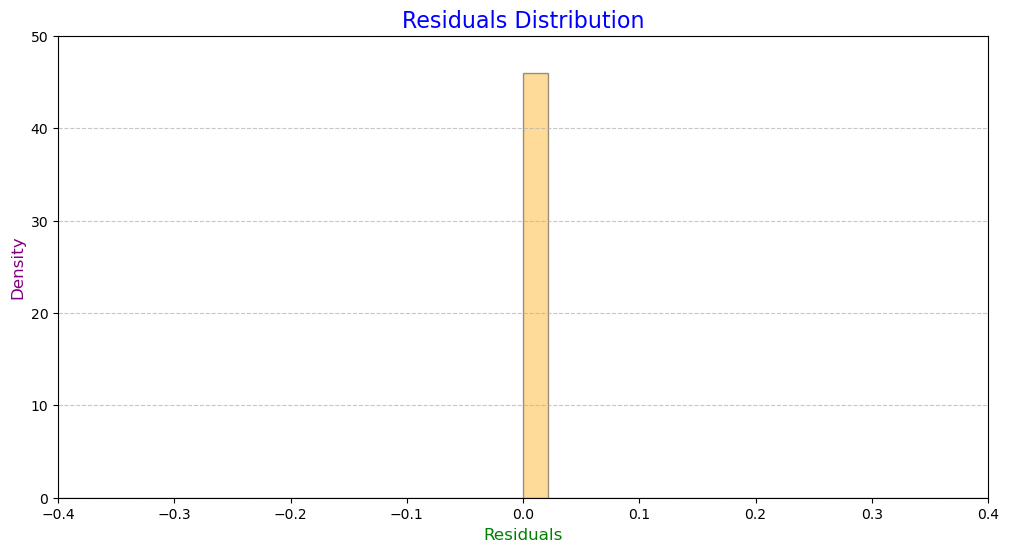


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


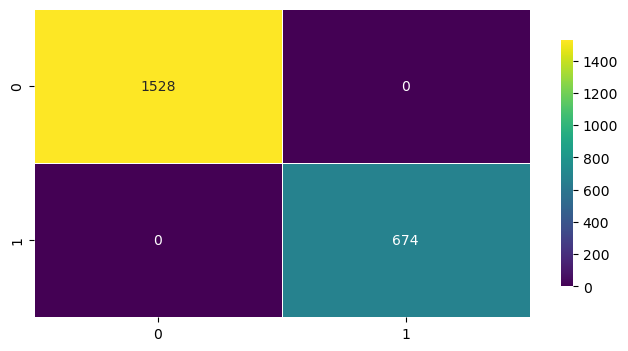

In [190]:
evaluate_model(CatBoostClassifier(),'Cat Boost', X_train, y_train, X_test, y_test)

### All Model Performance Comparison

In [191]:
df_results = pd.DataFrame(evaluation_results)

In [192]:
df_results

,Model,Training Score,Testing Score
0,Logistic Regression,1.000000,1.000000
1,KNN,1.000000,0.999546
2,SVM,1.000000,0.999546
3,Naive Bayes,0.999394,0.999092
4,Descision Tree,1.000000,1.000000
5,Random Forest,1.000000,1.000000
6,Ada Boost,1.000000,1.000000
7,Gradient Boost,1.000000,1.000000
8,LGBM,1.000000,1.000000
9,XG Boost,1.000000,0.999546


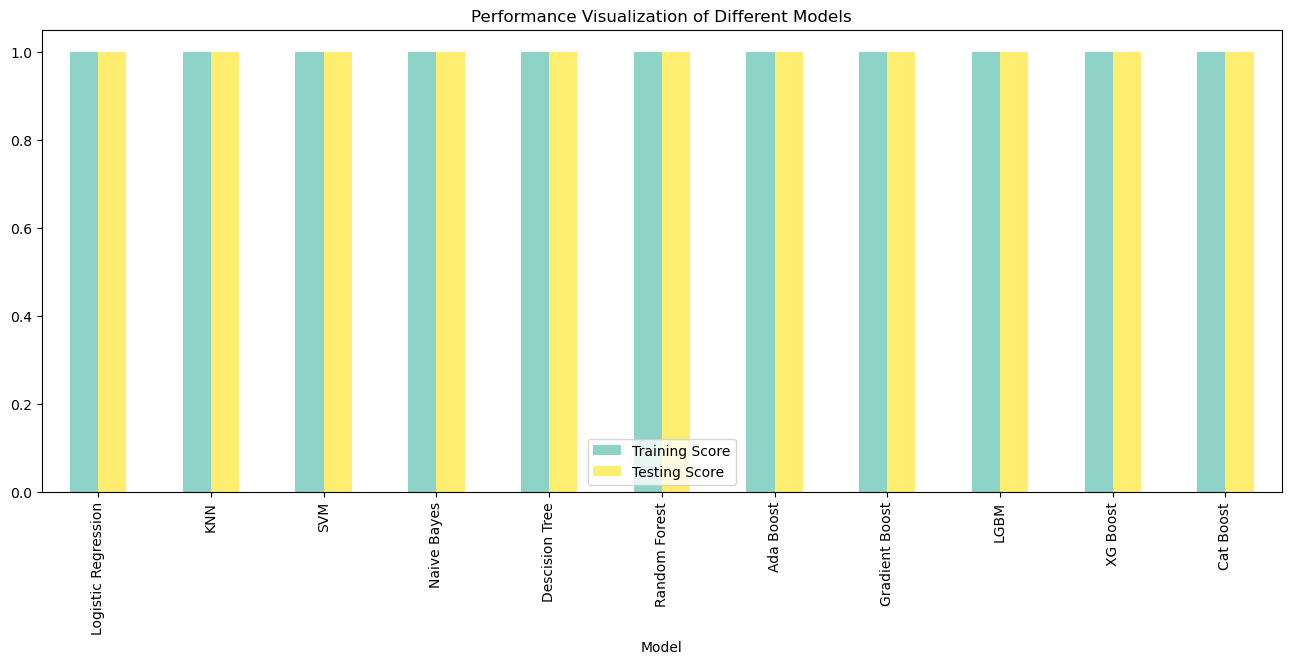

In [193]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

### Hyper-Parameter Tunning of LGBM Model

In [194]:
model1 = LGBMClassifier()

In [195]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}     

In [196]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# When search space is small & computational resources are enough ==> Grid Search
# When search space is large & computational resources are limited ==> Random Search

In [197]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [198]:
grid_search1.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [199]:
grid_search1.best_score_

1.0

In [200]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 300,
 'num_leaves': 16,
 'random_state': 0}

In [201]:
# Creating LGBM Model Using Best Parameters.

In [202]:
model1 = LGBMClassifier(**best_parameters1)

In [203]:
model1.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=300, num_leaves=16,
               random_state=0)

In [204]:
X_test_pred1 = model1.predict(X_test)

In [205]:
accuracy_score(y_test,X_test_pred1)

1.0

### Hyper-Parameter Tunning of CatBoost Model

In [206]:
model2 = CatBoostClassifier(verbose=False)

In [207]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [208]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [209]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000240AE508E80>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [210]:
grid_search2.best_score_

1.0

In [211]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 35, 'learning_rate': 0.1, 'random_state': 0}

In [212]:
# Creating Cat Boost Model Using Best Parameters

In [213]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)

In [214]:
model2.fit(X_train,y_train)

In [215]:
X_test_pred2 = model2.predict(X_test)

In [216]:
accuracy_score(y_test,X_test_pred2)

1.0

### Hyper-Parameter Tunning of XGBoost Model

In [217]:
model3 = XGBClassifier()

In [218]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [219]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [220]:
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [221]:
grid_search3.best_score_

1.0

In [222]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [223]:
# Creating XGBoost Model Using Best Parameters

In [224]:
model3 = XGBClassifier(**best_parameters3)

In [225]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [226]:
X_test_pred3 = model3.predict(X_test)

In [227]:
accuracy_score(y_test,X_test_pred3) 

0.9995458673932789

### Hyper Parameter Tunning of RandomForest Model

In [228]:
model4 = RandomForestClassifier()

In [229]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [230]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [231]:
grid_search4.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [232]:
grid_search4.best_score_

1.0

In [233]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [234]:
# Creating Random Forest Model Using Best Parameters

In [235]:
model4 = RandomForestClassifier(**best_parameters4)

In [236]:
model4.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7)

In [237]:
X_test_pred4 = model4.predict(X_test)

In [238]:
accuracy_score(y_test,X_test_pred4)

1.0

### Stacking Classifier Model

In [239]:
from sklearn.ensemble import StackingClassifier

In [240]:
stacking_model = StackingClassifier(estimators=[('LGBM', model1), 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4)])

In [241]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.01,
                                               n_estimators=300, num_leaves=16,
                                               random_state=0)),
                               ('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x00000240AE50B9A0>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_roun...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=0, ...)),
                               ('RF',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=4,
                                                       min_samples_split=7))])

In [242]:
X_train_pred5 = stacking_model.predict(X_train)

In [243]:
X_test_pred5 = stacking_model.predict(X_test)

In [244]:
print(f"Stacking Model accuracy on Training Data is: {accuracy_score(y_train,X_train_pred5)*100:.2f}%")

Stacking Model accuracy on Training Data is: 100.00%


In [245]:
print(f"Stacking Model accuracy on Testing Data is: {accuracy_score(y_test,X_test_pred5)*100:.2f}%")

Stacking Model accuracy on Testing Data is: 100.00%


### Thank you !!